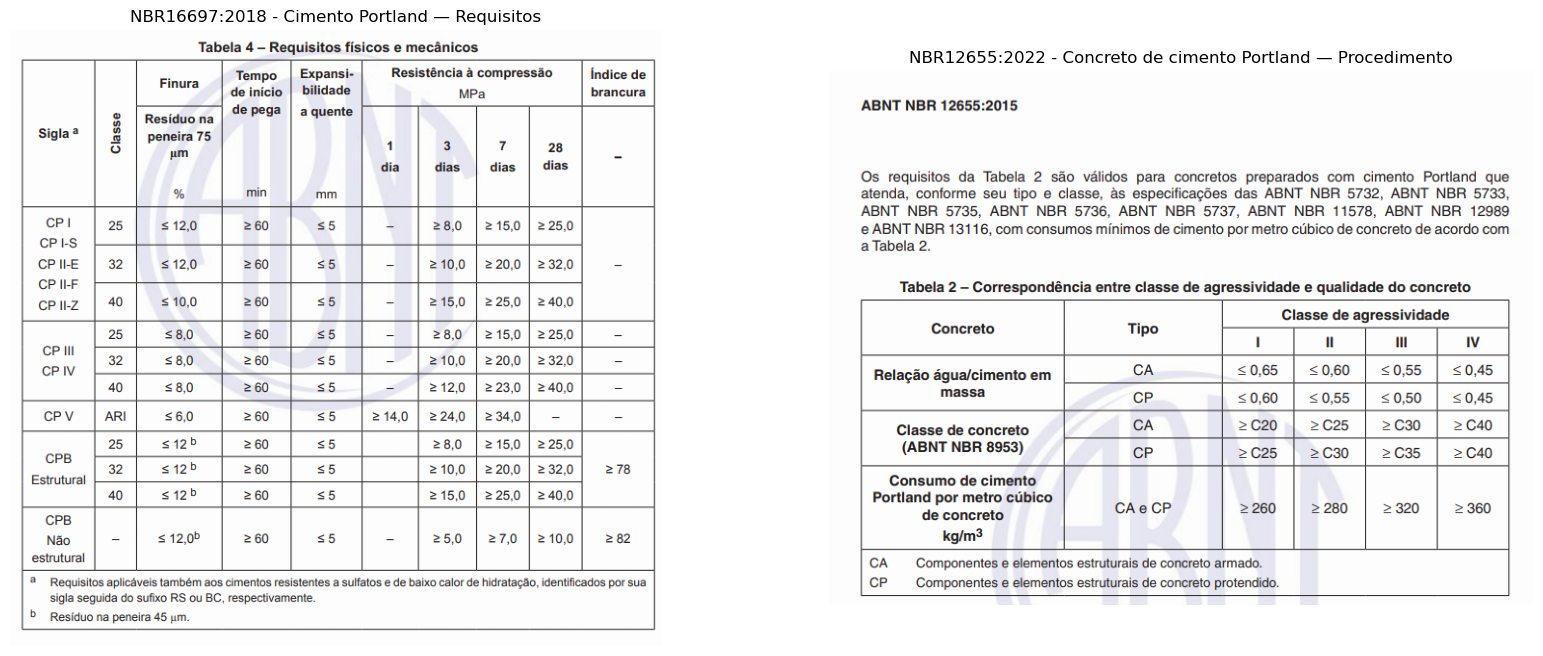

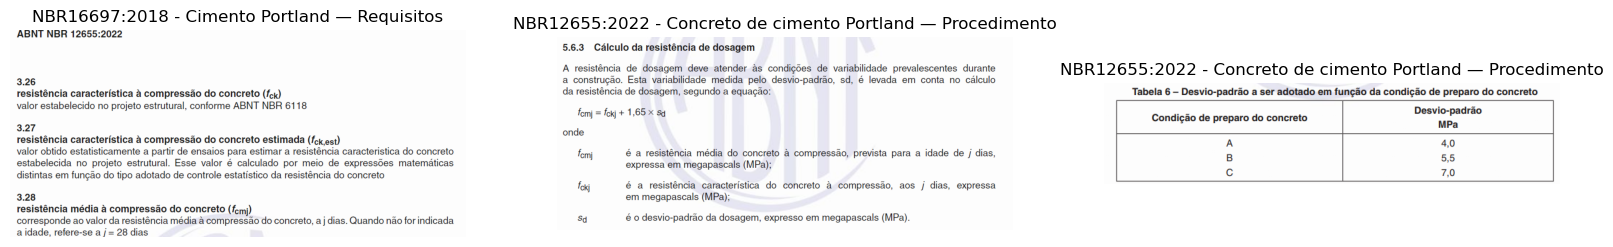

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

img1 = mpimg.imread('imgs/nbr16697.png')
axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes
axs[0].set_title('NBR16697:2018 - Cimento Portland — Requisitos')

img2 = mpimg.imread('imgs/nbr12655.png')
axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes
axs[1].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')

plt.show()


# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

img3 = mpimg.imread('imgs/nbr12655_definicoes.png')
axs[0].imshow(img3)
axs[0].axis('off')  # Hide axes
axs[0].set_title('NBR16697:2018 - Cimento Portland — Requisitos')

img4 = mpimg.imread('imgs/nbr12655_resistencia.png')
axs[1].imshow(img4)
axs[1].axis('off')  # Hide axes
axs[1].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')

img5 = mpimg.imread('imgs/nbr12655_sd.png')
axs[2].imshow(img5)
axs[2].axis('off')  # Hide axes
axs[2].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')


def NBR_compressive_strength(concrete_class, age_days):
    # Dictionary to hold compressive strength data at 3, 7, and 28 days for each class
    compressive_strength = {
        'CP I': {'3_days': 8.0, '7_days': 15.0, '28_days': 25.0},
        'CP I-S': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP I-E': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP II-F': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP II-Z': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP III': {'3_days': 10.0, '7_days': 18.0, '28_days': 25.0},
        'CP IV': {'3_days': 14.0, '7_days': 23.0, '28_days': 40.0},
        'CP V': {'3_days': 14.0, '7_days': 24.0, '28_days': 34.0},
    }

    # Get the compressive strength for the specified class
    if concrete_class in compressive_strength:
        return compressive_strength[concrete_class][age_days]
    else:
        return "Concrete class/age not found"

# Example usage:
concrete_class = 'CP V'
age = '7_days'
strength = NBR_compressive_strength(concrete_class, age)
# print(f"Compressive strength for {concrete_class}:\n{age}: {strength}")

def run_regression(data, drop_columns, target):
    X = data.drop(drop_columns, axis=1)
    y = data[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()
    
    # Fit the scaler on the training data and transform both the training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the regression algorithms
    regressors = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'Gradient Boosting Regressor': GradientBoostingRegressor()
    }
    
    # Initialize a dictionary to store results
    results = {}
    
    # Train and evaluate each regressor
    for name, regressor in regressors.items():
        # Train the model
        regressor.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = regressor.predict(X_test_scaled)
        
        # Calculate performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T
    
    # Print the report
    print("Regression Algorithms Performance Report:")
    print(results_df)

In [2]:
from PreProcessing_toolbox import *
from Regression_toolbox import *

data = pd.read_excel('data/Concreto_IACC.xlsx')

df_cimento = data[~data['cimento Classe de resistência'].isna()]
df_cimento.rename(columns = {'CT Água ' : 'CT Água'})

df_cimento.columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Volume', 'Nome produto',
       'Código do produto', 'Data', 'Horário', 'Cidade', 'Nome Central',
       'cimento Tipo', 'cimento Classe de resistência',
       'cimento Resistência real 3d', 'cimento Resistência real 7d',
       'cimento Resistência real 28d', 'cimento Fornecedor', 'cimento Cidade',
       'concreto Cimento', 'concreto Fíler calcário', 'concreto Cinza volante',
       'concreto Escória', 'concreto Argila calcinada', 'concreto Silica',
       'concreto Plastificante', 'concreto Polifuncional',
       'concreto Superplastificante', 'concreto Incorporador de ar',
       'concreto Brita 0', 'concreto Brita 1', 'concreto Brita 2',
       'concreto Areia natural', 'concreto Areia artificial',
       'concreto Água (automação)', 'concreto Água (ponto de carga)',
       'concreto Água (lastro de retorno)', 'concreto Água caminhão',
       'concreto Umidade brita 0', 'concreto Umidade brita 1',
       'concreto Umidade brita 2', 'concreto Umidade areia natural',
       'concreto Umidade areia artificial', 'Mesp Brita 0', 'Mesp Brita 1',
       'Mesp Brita 2', 'Mesp Areia natural', 'Mesp Areia artificial',
       'Tempo de transporte', 'Temperatura ambiente', 'Slump', 'Fc 1d',
       'Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck', 'CT Cimento', 'CT Fíler calcário',
       'CT Cinza volante', 'CT Escória', 'CT Argila calcinada', 'CT Silica',
       'CT Plastificante', 'CT Polifuncional', 'CT Superplastificante',
       'CT Incorporador de ar', 'CT Brita 0', 'CT Brita 1', 'CT Brita 2',
       'CT Areia natural', 'CT Areia artificial', 'CT Água']


df_concreto = df_cimento[['Empresa', 'Planta', 'Nota Fiscal',
'Data', 'Horário', 'Cidade', 
'cimento Tipo', 'cimento Classe de resistência',
'concreto Cimento', 'concreto Fíler calcário', 'concreto Cinza volante',
'concreto Escória', 'concreto Argila calcinada', 'concreto Silica',
'concreto Plastificante', 'concreto Polifuncional',
'concreto Superplastificante', 'concreto Incorporador de ar',
'concreto Brita 0', 'concreto Brita 1', 'concreto Brita 2',
'concreto Areia natural', 'concreto Areia artificial',
'concreto Água (automação)', 'concreto Água (ponto de carga)',
'concreto Água (lastro de retorno)', 'concreto Água caminhão',
'concreto Umidade brita 0', 'concreto Umidade brita 1',
'concreto Umidade brita 2', 'concreto Umidade areia natural',
'concreto Umidade areia artificial', 'Mesp Brita 0', 'Mesp Brita 1',
'Mesp Brita 2', 'Mesp Areia natural', 'Mesp Areia artificial',
'Tempo de transporte', 'Temperatura ambiente', 'Slump', 'Fc 1d',
'Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck', 'CT Cimento', 'CT Fíler calcário',
'CT Cinza volante', 'CT Escória', 'CT Argila calcinada', 'CT Silica',
'CT Plastificante', 'CT Polifuncional', 'CT Superplastificante',
'CT Incorporador de ar', 'CT Brita 0', 'CT Brita 1', 'CT Brita 2',
'CT Areia natural', 'CT Areia artificial', 'CT Água']]

# df_concreto = df_concreto.dropna(axis=1, how='all')

missing_percentage = df_concreto.isna().mean() * 100
dropout_columns_NA = missing_percentage[missing_percentage > 70].index

missing_percentage[missing_percentage > 20]


# /*******//*******//*******//*******//*******//*******//*******//*******//*******//*******//*******//*******//*******/


df_concreto_traco = df_concreto[df_concreto.columns[~df_concreto.columns.isin(dropout_columns_NA)]].copy()

df_concreto_traco['CT Polifuncional'] = df_concreto_traco['CT Polifuncional'].str.replace(',,', '', regex=False)

df_concreto_traco['cimento Classe de resistência'] = df_concreto_traco['cimento Classe de resistência'].astype(str)


def extract_mean(value):
    match = re.match(r'(\d+)', value)  # Extract numbers before any non-numeric characters
    if match:
        return float(match.group(1))
    else:
        return None
    
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].astype(str)
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].str.replace('S', '')
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].apply(extract_mean)
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].astype(int)

df_concreto_traco['cimento Tipo'] = df_concreto_traco['cimento Tipo'].str.strip()

ID_columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Data', 'Horário', 'Cidade', 'cimento Tipo', 'cimento Classe de resistência']
FCK_columns = ['Fc 1d', 'Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck']

for c in df_concreto_traco.columns[~df_concreto_traco.columns.isin(ID_columns)]:
    df_concreto_traco.loc[:, c] = df_concreto_traco.loc[:, c].replace('-', np.nan)
    df_concreto_traco[c] = df_concreto_traco[c].astype(float)
    
    # ATENÇÃO CONFIRMAR!!!
    df_concreto_traco.loc[:, c] = df_concreto_traco.loc[:, c].fillna(0)

df_concreto_traco.to_pickle('data/data_clean_Concreto_traco.pkl')

df_concreto_traco

# Pré-processamento

## Filtro "empírico"

In [3]:
ID_columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Data', 'Horário', 'Cidade', 'cimento Tipo', 'cimento Classe de resistência']
FCK_columns = ['Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck']

df_concreto_traco = pd.read_pickle('data/data_clean_Concreto_traco.pkl')
df_concreto_traco.head()

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,CT Plastificante,CT Polifuncional,CT Superplastificante,CT Incorporador de ar,CT Brita 0,CT Brita 1,CT Brita 2,CT Areia natural,CT Areia artificial,CT Água
12080,303,AA,49654,07/10/2021,14:11:37,SÃO JOSÉ DO RIO PRETO,CP II-F,40,212.875000,1.996250,...,0.0,0.0,0.0,0.0,1074.0,0.0,0.0,889.0,0.0,193.0
12081,303,AA,50407,22/11/2021,09:35:14,SÃO JOSÉ DO RIO PRETO,CP II-F,40,228.000000,2.204998,...,0.0,0.0,0.0,0.0,283.0,851.0,0.0,841.0,0.0,186.0
12082,303,AA,49613,06/10/2021,11:18:42,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.125000,1.904999,...,0.0,0.0,0.0,0.0,339.0,794.0,0.0,866.0,0.0,185.0
12083,303,AA,49657,07/10/2021,15:37:02,SÃO JOSÉ DO RIO PRETO,CP II-F,40,213.272727,2.021817,...,0.0,0.0,0.0,0.0,1074.0,0.0,0.0,889.0,0.0,193.0
12084,303,AA,49604,06/10/2021,07:31:10,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.250000,1.901249,...,0.0,0.0,0.0,0.0,339.0,794.0,0.0,866.0,0.0,185.0


In [4]:
# Cria variável 'A/C', converte tipos, aplica filtros que estão nos parâmetros (valores < que)
df_traco_processed = preprocess_data(data = df_concreto_traco,
                                     params_filter = {'Fc 28d': 60,
                                                     # 'CT Polifuncional': 1,
                                                     # 'CT Plastificante': 0.5
                                     })

df_traco_processed

Feature Planta não é numerica

Feature Data não é numerica

Feature Horário não é numerica

Feature Cidade não é numerica

Feature cimento Tipo não é numerica

Feature cimento Classe de resistência não é numerica



,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
12080,303.0,AA,49654.0,07/10/2021,14:11:37,SÃO JOSÉ DO RIO PRETO,CP II-F,40,212.875000,1.996250,...,1074.0,889.0,1963.0,5.042254,0.000000,4.173709,0.000000,5.042254,4.173709,9.215962
12081,303.0,AA,50407.0,22/11/2021,09:35:14,SÃO JOSÉ DO RIO PRETO,CP II-F,40,228.000000,2.204998,...,1134.0,841.0,1975.0,1.235808,3.716157,3.672489,0.000000,4.951965,3.672489,8.624454
12082,303.0,AA,49613.0,06/10/2021,11:18:42,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.125000,1.904999,...,1133.0,866.0,1999.0,1.661765,3.892157,4.245098,0.000000,5.553922,4.245098,9.799020
12083,303.0,AA,49657.0,07/10/2021,15:37:02,SÃO JOSÉ DO RIO PRETO,CP II-F,40,213.272727,2.021817,...,1074.0,889.0,1963.0,5.042254,0.000000,4.173709,0.000000,5.042254,4.173709,9.215962
12084,303.0,AA,49604.0,06/10/2021,07:31:10,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.250000,1.901249,...,1133.0,866.0,1999.0,1.661765,3.892157,4.245098,0.000000,5.553922,4.245098,9.799020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236402,303.0,Z,74824.0,19/10/2021,15:59:24,BRASÍLIA,CP II-F,40,332.875000,3.714996,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236403,303.0,Z,82901.0,20/02/2023,08:07:39,BRASÍLIA,CP II-F,40,397.250000,4.003750,...,1017.0,722.0,1739.0,0.575071,2.305949,0.898017,1.147309,2.881020,2.045326,4.926346
236404,303.0,Z,76483.0,13/01/2022,07:37:00,BRASÍLIA,CP II-F,40,348.250000,3.303745,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931
236405,303.0,Z,76284.0,29/12/2021,17:48:42,BRASÍLIA,CP II-F,40,327.125000,3.102501,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931


In [5]:
run_regression_CV(data = df_traco_processed,
               drop_columns = ID_columns + FCK_columns,
               target = 'Fc 28d')

Regression Algorithms Performance Report:
                                  MAE        MSE        R2
Linear Regression            4.004302  26.860064  0.635543
Decision Tree Regressor      4.063282  29.123570  0.604825
Random Forest Regressor      3.146844  17.407986  0.763806
Gradient Boosting Regressor  3.635015  22.078930  0.700432


In [6]:
# X = df_traco_processed.drop(ID_columns + FCK_columns, axis = 1)
# y = df_traco_processed['Fc 28d']
# 
# eval_regressor_CV(X, X, y, y, regressors = None, CV = True)

## Filtros NBR

In [7]:
# Remove de acordo com parâmetros, aPlica filtros da norma (fator a/c, resistencia esperada,etc)
df_traco_processed_NBR = apply_standardization_filter(data = df_traco_processed,
                                                      remove_params = { '15' : 15,
                                                                        '50' : 50})

df_traco_processed_NBR

Instâncias eliminadas devido a falta de representatividade (Fck = 15 MPA):                 5
Instâncias eliminadas devido a falta de representatividade (Fck = 50 MPA):                 42
Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):         15836
Instâncias eliminadas devido não conformidade resistência especificada:                    2700


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
12553,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
12919,303.0,AA,49430.0,28/09/2021,12:59:05,SÃO JOSÉ DO RIO PRETO,CP II-F,40,320.375000,3.102497,...,1133.0,789.0,1922.0,1.153061,2.700680,2.683673,0.000000,3.853741,2.683673,6.537415
13026,303.0,AA,49999.0,26/10/2021,14:41:28,SÃO JOSÉ DO RIO PRETO,CP II-F,40,306.375000,2.901249,...,1133.0,778.0,1911.0,1.104235,2.586319,2.534202,0.000000,3.690554,2.534202,6.224756
13125,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1179.0,770.0,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685
13141,303.0,AA,49990.0,26/10/2021,09:50:46,SÃO JOSÉ DO RIO PRETO,CP II-F,40,305.500000,2.900002,...,1133.0,778.0,1911.0,1.104235,2.586319,2.534202,0.000000,3.690554,2.534202,6.224756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236401,303.0,Z,74976.0,26/10/2021,13:47:38,BRASÍLIA,CP II-F,40,332.750000,3.693748,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236402,303.0,Z,74824.0,19/10/2021,15:59:24,BRASÍLIA,CP II-F,40,332.875000,3.714996,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236403,303.0,Z,82901.0,20/02/2023,08:07:39,BRASÍLIA,CP II-F,40,397.250000,4.003750,...,1017.0,722.0,1739.0,0.575071,2.305949,0.898017,1.147309,2.881020,2.045326,4.926346
236404,303.0,Z,76483.0,13/01/2022,07:37:00,BRASÍLIA,CP II-F,40,348.250000,3.303745,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931


In [8]:
run_regression_CV(data = df_traco_processed_NBR,
               drop_columns =  ID_columns + FCK_columns,
               target = 'Fc 28d')

Regression Algorithms Performance Report:
                                  MAE        MSE        R2
Linear Regression            3.715823  21.965176  0.461698
Decision Tree Regressor      3.666396  23.049760  0.435113
Random Forest Regressor      2.979896  14.937683  0.633890
Gradient Boosting Regressor  3.315671  17.616078  0.568252


# Baseline regressão

In [9]:
instances_per_class = df_traco_processed_NBR.groupby(['cimento Tipo', 'cimento Classe de resistência', 'Fck']).count()['Fc 28d'].reset_index()

keep_instances = instances_per_class[instances_per_class['Fc 28d'] > 30].reset_index()

df_traco_processed_NBR = df_traco_processed_NBR.merge(
                                keep_instances[['cimento Tipo', 'cimento Classe de resistência', 'Fck']],
                                on=['cimento Tipo', 'cimento Classe de resistência', 'Fck'],
                                how='inner')

df_traco_processed_NBR

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
0,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
1,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1179.0,770.0,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685
2,303.0,AA,59842.0,16/03/2023,08:24:51,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.809998,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
3,303.0,AA,59849.0,16/03/2023,11:14:41,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.625000,2.797501,...,1163.0,768.0,1931.0,1.191781,2.791096,2.630137,0.000000,3.982877,2.630137,6.613014
4,303.0,AA,59841.0,16/03/2023,08:12:38,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.812500,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22811,303.0,N,71662.0,01/11/2022,13:43:40,FLORIANÓPOLIS,CP IV,32,363.250000,2.503750,...,956.0,795.0,1751.0,2.853731,0.000000,1.182090,1.191045,2.853731,2.373134,5.226866
22812,303.0,N,67943.0,11/04/2022,13:39:29,FLORIANÓPOLIS,CP IV,32,0.000000,0.000000,...,985.0,809.0,1794.0,2.914201,0.000000,1.165680,1.227811,2.914201,2.393491,5.307692
22813,303.0,N,68493.0,13/05/2022,13:47:33,FLORIANÓPOLIS,CP IV,32,366.000000,2.401249,...,1049.0,812.0,1861.0,0.677419,2.706452,1.277419,1.341935,3.383871,2.619355,6.003226
22814,303.0,N,68383.0,06/05/2022,10:51:32,FLORIANÓPOLIS,CP IV,32,384.166667,2.703334,...,1049.0,815.0,1864.0,0.677419,2.706452,1.280645,1.348387,3.383871,2.629032,6.012903


In [10]:
# Como não foi feita imputação de valores, somente remoção e verificações que mantem os dados independentes, aqui é feita separação treino-validação-teste
group_columns = ['cimento Tipo', 'cimento Classe de resistência', 'Fck']
drop_columns = [col for col in ID_columns + FCK_columns if col not in group_columns and col in df_traco_processed_NBR.columns]
target = 'Fc 28d'

X = df_traco_processed_NBR.drop(drop_columns, axis=1)
y = df_traco_processed_NBR[target]

# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = stratify_col,
                                                    random_state=42)


# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X_train[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train,
                                        test_size=0.3,
                                        stratify = stratify_col,
                                        random_state=42)

X_tr_clean = X_tr.drop(columns = group_columns)
X_ts_clean = X_ts.drop(columns = group_columns)

print('Training-Test set:')
for v in [y_train, y_test]:
    print(v.shape)

print('\nTraining-Validation set:')
for v in [y_tr, y_ts]:
    print(v.shape)

Training-Test set:
(15971,)
(6845,)

Training-Validation set:
(11179,)
(4792,)


In [11]:
eval_regressor_CV(X_tr_clean, X_ts_clean, y_tr, y_ts, regressors = None, CV = True, n_splits = 3)

,MAE_tr,MSE_tr,R2_tr,MAE_val,MSE_val,R2_val,MAE_test,MSE_test,R2_test
Linear Regression,3.707304,21.814365,0.468117,3.726412,22.053579,0.462124,3.647404,21.168958,0.457198
Decision Tree Regressor,0.310797,1.159084,0.971753,4.005045,27.492096,0.329460,3.896302,25.982147,0.333781
Random Forest Regressor,1.302891,3.104999,0.924308,3.168492,16.601634,0.595190,3.060120,15.497359,0.602626
Gradient Boosting Regressor,3.222928,16.499897,0.597652,3.361456,17.996383,0.561211,3.280569,17.194008,0.559121


In [12]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    }

best_selector = grid_search_FS_RF(X_tr_clean, y_tr, param_grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RandomForestRegressor:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Feature Importances for the Best Model:
                              Feature  Importance
26                                 AC    0.343459
14                Tempo de transporte    0.091980
17                          CT Silica    0.076838
33        CT Areia artificial_Cimento    0.032910
23                   CT Areia natural    0.027565
13              Mesp Areia artificial    0.026742
12                 Mesp Areia natural    0.024455
20              CT Superplastificante    0.023444
15                              Slump    0.023371
28                        Areia_total    0.022159
24                CT Areia artificial    0.021209
32           CT Areia natural_Cimento    0.020669
27                        Brita_total    0.019110
29                          Agregados    0.018377
0                    concreto Cimento    0

In [13]:
feat_importance = best_selector[1]
features_selected = feat_importance['Feature'].tolist()[:10]
features_selected

['AC',
 'Tempo de transporte',
 'CT Silica',
 'CT Areia artificial_Cimento',
 'CT Areia natural',
 'Mesp Areia artificial',
 'Mesp Areia natural',
 'CT Superplastificante',
 'Slump',
 'Areia_total']

In [14]:
eval_regressor_CV(X_tr[features_selected], X_ts[features_selected], y_tr, y_ts, regressors = None, CV = True, n_splits = 3)

,MAE_tr,MSE_tr,R2_tr,MAE_val,MSE_val,R2_val,MAE_test,MSE_test,R2_test
Linear Regression,3.898766,24.005913,0.414722,3.902359,24.051662,0.413540,3.794707,22.978598,0.410796
Decision Tree Regressor,0.461405,1.691333,0.958782,3.922003,26.065253,0.364601,3.837365,24.876292,0.362137
Random Forest Regressor,1.399881,3.587327,0.912553,3.238646,17.340820,0.577226,3.159188,16.423772,0.578871
Gradient Boosting Regressor,3.293708,17.167320,0.581408,3.392997,18.309651,0.553558,3.331248,17.673879,0.546817


## Análise dos erros

Mean Squared Error (MSE): 15.929380881276538
Mean Absolute Error (MAE): 3.1130767608271603
R-squared (R2): 0.5915482961138283
Error Analysis by Composite Class:
     Composite_Class  Residual                               Actual
                          mean       std      max        min  count
0         CP II-E_40 -0.251199  4.161545  18.7670 -11.070000    634
1         CP II-F_40 -0.153985  3.731987  15.3849 -13.427700   1298
2          CP III_40  1.459193  5.173232  10.9890  -4.049400      7
3           CP IV_32 -0.175550  3.613319  16.7490 -13.175117    323
4        CPIII RS_40 -0.316168  4.694486  12.2529 -18.589300    270
5  CPV ARI RS_ARI-RS  0.113948  4.039527  17.0000 -13.575133   2260


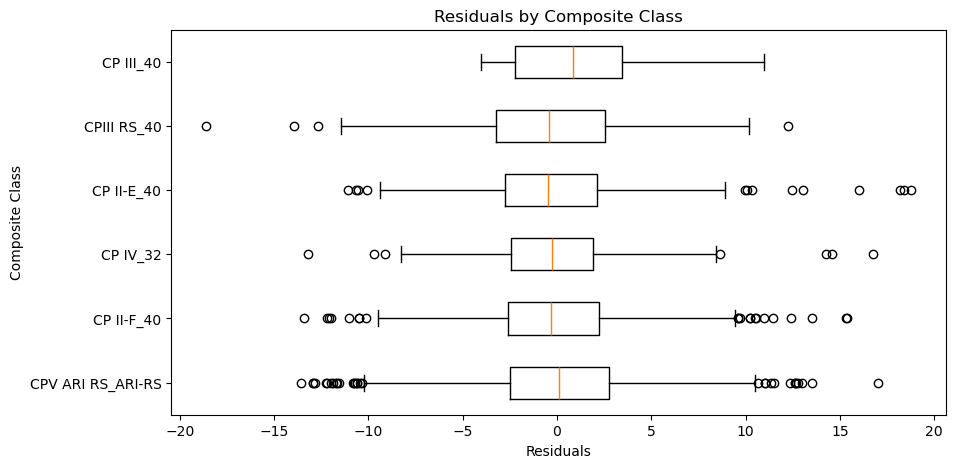

In [15]:
import matplotlib.pyplot as plt


# Fit Random Forest Regressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_tr[features_selected], y_tr)

# Make predictions
y_pred = rf.predict(X_ts[features_selected])

# Calculate residuals
residuals = y_ts - y_pred

# General Performance Metrics
mse = mean_squared_error(y_ts, y_pred)
mae = mean_absolute_error(y_ts, y_pred)
r2 = r2_score(y_ts, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Assuming 'Class1' and 'Class2' are the two columns to stratify by
class_column1 = X_ts[group_columns[0]]
class_column2 = X_ts[group_columns[1]]

# Create a composite class by combining the two columns
composite_class = class_column1.astype(str) + '_' + class_column2.astype(str)

# Create a DataFrame for analysis
results_df = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred,
    'Residual': residuals,
    'Composite_Class': composite_class
})

# Analyze errors by composite class
error_by_composite_class = results_df.groupby('Composite_Class').agg({
    'Residual': ['mean', 'std', 'max', 'min'],
    'Actual': 'count'
}).reset_index()

print("Error Analysis by Composite Class:")
print(error_by_composite_class)

# Visualize error by composite class
plt.figure(figsize=(10, 5))
plt.boxplot([results_df[results_df['Composite_Class'] == cls]['Residual'] for cls in results_df['Composite_Class'].unique()],
            labels=results_df['Composite_Class'].unique(), vert=False)
plt.title('Residuals by Composite Class')
plt.ylabel('Composite Class')
plt.xlabel('Residuals')
plt.show()


# Focando no tipo de concreto/cimento

In [16]:
tr_CPV = pd.concat([X_tr, y_tr], axis = 1)
tr_CPV = preprocess_data(data = tr_CPV[tr_CPV['cimento Tipo'] == 'CPV ARI RS'],
                                     params_filter = {}, verbose = False)



X_tr_CPV = tr_CPV.drop(columns = 'Fc 28d')
y_tr_CPV = tr_CPV['Fc 28d']

ts_CPV = pd.concat([X_ts, y_ts], axis = 1)
ts_CPV = preprocess_data(data = ts_CPV[ts_CPV['cimento Tipo'] == 'CPV ARI RS'],
                                     params_filter = {}, verbose = False)

X_ts_CPV = ts_CPV.drop(columns = 'Fc 28d')
y_ts_CPV = ts_CPV['Fc 28d']

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [2, 10],
    'min_samples_split': [2, 5],
    }

feature_selector = grid_search_FS_RF(X_tr_CPV.drop(columns = group_columns), y_tr_CPV, param_grid_rf, verbose = False)

feat_importance = feature_selector[1]
features_selected = feat_importance['Feature'].tolist()[:10]

X_tr_CPV_FS = X_tr_CPV[features_selected]
X_ts_CPV_FS = X_ts_CPV[features_selected]

eval_regressor_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                  regressors = None, CV = True, n_splits = 3)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


,MAE_tr,MSE_tr,R2_tr,MAE_val,MSE_val,R2_val,MAE_test,MSE_test,R2_test
Linear Regression,3.586259,20.172039,0.532308,3.594838,20.308551,0.529137,3.481965,19.049775,0.540680
Decision Tree Regressor,0.644627,2.372069,0.944988,4.004672,26.800078,0.378282,3.876504,24.801754,0.401990
Random Forest Regressor,1.521021,4.191825,0.902792,3.318163,18.291386,0.575660,3.208972,16.625475,0.599133
Gradient Boosting Regressor,3.089003,15.074122,0.650484,3.256925,16.863703,0.608978,3.176617,15.862564,0.617528


In [17]:

param_grid_regressor = {
    'n_estimators': [50, 150, 300],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'bootstrap': [True, False]
    }


rf_gridsearch_CPV = grid_search_RFClassifier(X_tr_CPV_FS, y_tr_CPV, param_grid_regressor, 3)

results_CPV_FS = eval_regressor_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                  regressors = {'RF grid_search' : rf_gridsearch_CPV.best_estimator_},
                  CV = True, n_splits = 3)

results_CPV_FS

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val
RF grid_search,3.014325,2.577263,3.115936,14.493635,10.630629,15.821257,0.650535,0.753499,0.633052


Mean Squared Error (MSE): 13.867265928904207
Mean Absolute Error (MAE): 2.9574928588519174
R-squared (R2): 0.6656380812356737


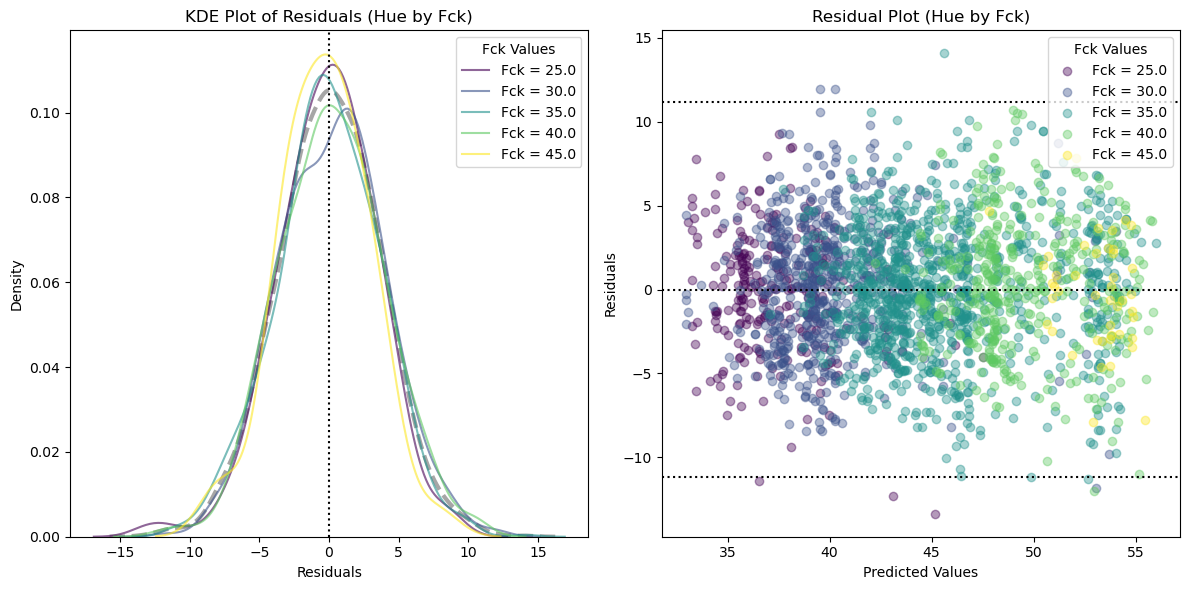

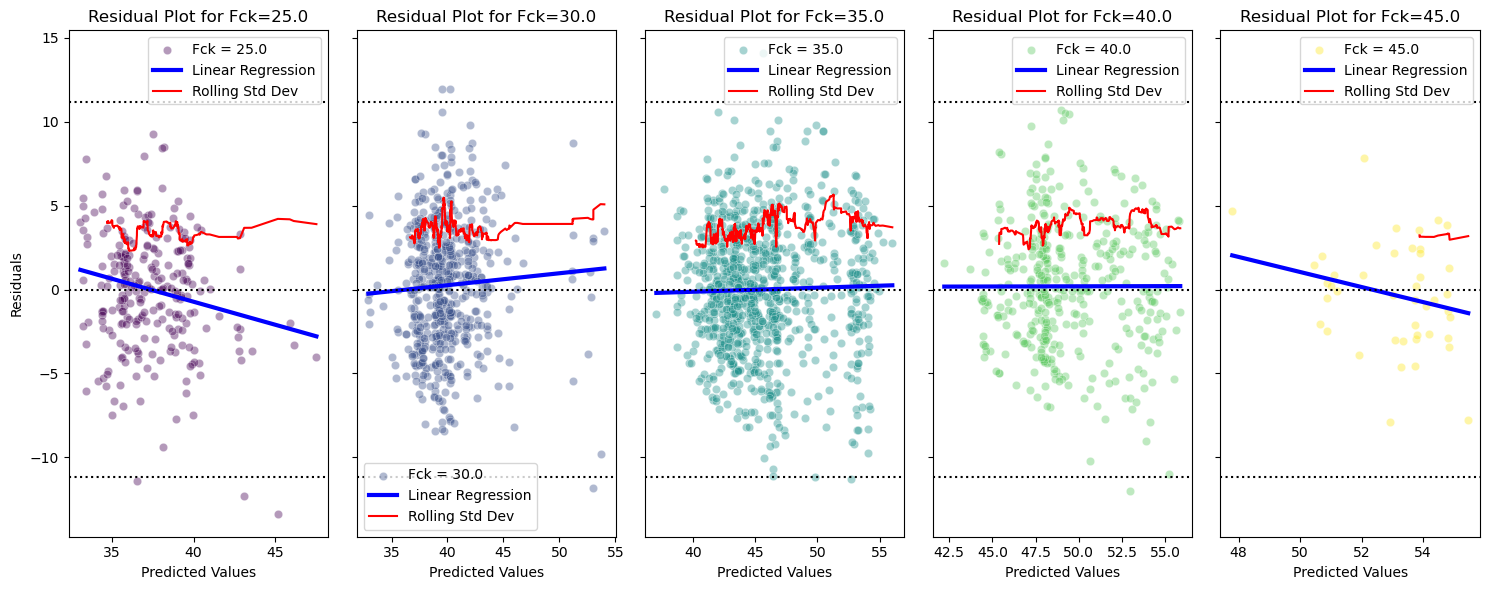

In [18]:
plot_residuals(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, group_columns, regressors = rf_gridsearch_CPV)

plot_residuals_with_rolling_std(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, group_columns,
                                window_size = 30, regressors = rf_gridsearch_CPV)

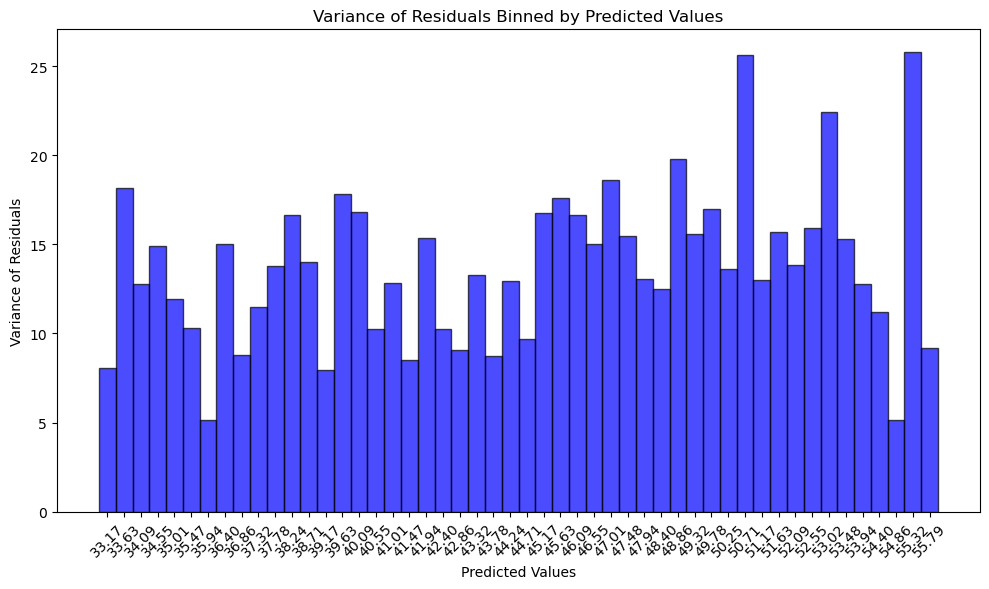

Levene's Test: Statistic = 4.1406641821202985, p-value = 0.006158024676854417
Bartlett's Test: Statistic = 19.456849682218152, p-value = 0.00021993027276213882


In [19]:
plot_residuals_binned_variance(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, n_bins=50, regressor = rf_gridsearch_CPV)
test_variance_homogeneity(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, regressor = rf_gridsearch_CPV)

In [20]:
param_grid_feat_selection = {
    'n_estimators': [25, 75, 150],
    'max_depth': [2, 10],
    }
    
param_grid_regressor = {
    'n_estimators': [50, 150, 300],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'bootstrap': [True, False]
    }



In [21]:
def run_experiment_ciment_fck(X_tr, X_ts, y_tr, y_ts, param_grid_feat_selection = None, param_grid_regressor = None,
                              n_splits = 5, group_columns = ['cimento Tipo', 'cimento Classe de resistência', 'Fck']):
    if not isinstance(param_grid_regressor, dict):
        param_grid_feat_selection = {
            'n_estimators': [25, 75, 150],
            'max_depth': [2, 10],
            }

    if not isinstance(param_grid_regressor, dict):
        param_grid_regressor = {
            'n_estimators': [25, 75, 150],
            'max_depth': [3, 15],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 2],
            'bootstrap': [True, False]
            }

    ciment_types = ['CP II', 'CPIII', 'CP IV', 'CPV']

    results = {}

    for ciment in ciment_types:
        if isinstance(ciment, list):
            # If ciment is a list, join the list elements with a regex 'OR' (|) for contains
            pattern = '|'.join(ciment)
        else:
            # If ciment is a string, use it directly
            pattern = ciment

        results[pattern] = {}

        print(15 * "**-----**")

        tr_CP = pd.concat([X_tr, y_tr], axis = 1)
        ts_CP = pd.concat([X_ts, y_ts], axis = 1)

        tr_CP = tr_CP[tr_CP['cimento Tipo'].str.contains(pattern)]
        ts_CP = ts_CP[ts_CP['cimento Tipo'].str.contains(pattern)]

        print(f'\n\nCiment: {pattern}\t "Treino": {tr_CP.shape}\t "Teste": {ts_CP.shape}')

        X_tr_CP = tr_CP.drop(columns = 'Fc 28d')
        y_tr_CP = tr_CP['Fc 28d']

        X_ts_CP = ts_CP.drop(columns = 'Fc 28d')
        y_ts_CP = ts_CP['Fc 28d']

        for fck in tr_CP['Fck'].sort_values().unique():

            tr_CP_fck = tr_CP[tr_CP['Fck'] == fck]

            if len(tr_CP_fck[tr_CP_fck['cimento Tipo'].str.contains(pattern)]) == 0:
                pass
            else:
                tr_CP_fck_PP = preprocess_data(data = tr_CP_fck,
                                               params_filter = {},
                                               verbose = False)

                X_tr_CP_fck = tr_CP_fck_PP.drop(columns = 'Fc 28d')
                y_tr_CP_fck = tr_CP_fck_PP['Fc 28d']

                ts_CP_fck = ts_CP[ts_CP['Fck'] == fck]
                ts_CP_fck_PP = ts_CP_fck[ts_CP_fck['cimento Tipo'].str.contains(pattern)]
                ts_CP_fck_PP = ts_CP_fck_PP[tr_CP_fck_PP.columns]

                X_ts_CP_fck = ts_CP_fck_PP.drop(columns = 'Fc 28d')
                y_ts_CP_fck = ts_CP_fck_PP['Fc 28d']

                print(f'\n\nFck: {fck}\t Treino: {X_tr_CP_fck.shape}\t Validação: {X_ts_CP_fck.shape}')

                print('\nGrid search - Feature selection')
                feature_selector_fck = grid_search_FS_RF(X = X_tr_CP_fck.drop(columns = group_columns),
                                                         y = y_tr_CP_fck,
                                                         param_grid = param_grid_feat_selection,
                                                         n_splits = n_splits,
                                                         verbose = False)

                feat_importance_fck = feature_selector_fck[1]
                features_selected_fck = feat_importance_fck['Feature'].tolist()[:15]
                X_tr_CP_FS_fck = X_tr_CP_fck[features_selected_fck]
                X_ts_CP_FS_fck = X_ts_CP_fck[features_selected_fck]

                print('\nGrid search - Regressor')
                rf_gridsearch_CP_fck = grid_search_RFClassifier(x_train = X_tr_CP_FS_fck,
                                                                y_train = y_tr_CP_fck,
                                                                param_grid = param_grid_regressor,
                                                                n_splits = n_splits)

                results[pattern][fck] = eval_regressor_CV(X_tr_CP_FS_fck,
                                                          X_ts_CP_FS_fck,
                                                          y_tr_CP_fck,
                                                          y_ts_CP_fck,
                                                          regressors = {
                                                              'Random Forest Regressor': rf_gridsearch_CP_fck.best_estimator_},
                                                          CV = True,
                                                          n_splits = n_splits)

                results[pattern][fck]['Shape_treino'] = str(X_tr_CP_FS_fck.shape)
                results[pattern][fck]['Shape_teste'] = str(X_ts_CP_FS_fck.shape)

                display(results[pattern][fck][
                            ['Shape_treino', 'Shape_teste', 'MAE_tr', 'R2_tr', 'MAE_val', 'R2_val', 'MAE_test',
                             'R2_test']])

        print(f'\n\nCiment: {pattern}\t Treino: {X_tr_CP.shape}\t Validação: {y_tr_CP.shape}')
        
        print('\nGrid search - Feature selection')
        feature_selector = grid_search_FS_RF(X = X_tr_CP.drop(columns = group_columns),
                                             y = y_tr_CP,
                                             param_grid = param_grid_feat_selection,
                                             n_splits = n_splits,
                                             verbose = False)

        feat_importance = feature_selector[1]
        features_selected = feat_importance['Feature'].tolist()[:15]

        X_tr_CP_FS = X_tr_CP[features_selected]
        X_ts_CP_FS = X_ts_CP[features_selected]

        print('\nGrid search - Regressor')
        rf_gridsearch_CP = grid_search_RFClassifier(x_train = X_tr_CP_FS,
                                                    y_train = y_tr_CP,
                                                    param_grid = param_grid_regressor,
                                                    n_splits = 3)

        results[pattern]['all'] = eval_regressor_CV(X_tr_CP_FS, X_ts_CP_FS, y_tr_CP, y_ts_CP,
                                                    regressors = {
                                                        'Random Forest Regressor': rf_gridsearch_CP.best_estimator_},
                                                    CV = True,
                                                    n_splits = 3)

        results[pattern]['all']['Shape_treino'] = str(X_tr_CP_FS.shape)
        results[pattern]['all']['Shape_teste'] = str(X_ts_CP_FS.shape)

        display(results[pattern]['all'])

        final_df = get_df_results(results)

        print('\n Compilado resultados:')
        display(final_df[final_df['Model'] == 'Random Forest Regressor'][
                    ['CP_Fck', 'Model', 'MAE_tr', 'R2_tr', 'MAE_test', 'R2_test', 'Shape_treino', 'Shape_teste']])

        plot_residuals(X_tr_CP[features_selected + ['Fck']], X_ts_CP[features_selected + ['Fck']], y_tr_CP, y_ts_CP,
                       group_columns, regressors = rf_gridsearch_CP)
        plot_residuals_with_rolling_std(X_tr_CP[features_selected + ['Fck']], X_ts_CP[features_selected + ['Fck']],
                                        y_tr_CP, y_ts_CP, group_columns, window_size = 30)


**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CP II	 "Treino": (4521, 41)	 "Teste": (1939, 41)


Fck: 25.0	 Treino: (125, 34)	 Validação: (54, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(125, 15)","(54, 15)",2.446858,0.486918,3.092928,0.139079,3.190272,0.101444




Fck: 30.0	 Treino: (943, 37)	 Validação: (404, 37)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(943, 15)","(404, 15)",1.425047,0.838818,2.785671,0.351823,3.138087,0.221004




Fck: 35.0	 Treino: (1927, 37)	 Validação: (827, 37)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1927, 15)","(827, 15)",1.871015,0.726429,2.946092,0.268449,2.787428,0.326844




Fck: 40.0	 Treino: (1526, 37)	 Validação: (654, 37)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1526, 15)","(654, 15)",1.595567,0.782565,2.862341,0.32335,2.790762,0.260295




Ciment: CP II	 Treino: (4521, 40)	 Validação: (4521,)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,2.88903,1.105442,2.910865,13.764726,2.011094,13.953824,0.569567,0.941183,0.591576,"(4521, 15)","(1939, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,2.446858,0.486918,3.190272,0.101444,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.425047,0.838818,3.138087,0.221004,"(943, 15)","(404, 15)"
2,CP II_35.0,Random Forest Regressor,1.871015,0.726429,2.787428,0.326844,"(1927, 15)","(827, 15)"
3,CP II_40.0,Random Forest Regressor,1.595567,0.782565,2.790762,0.260295,"(1526, 15)","(654, 15)"
4,CP II_all,Random Forest Regressor,1.105442,0.941183,2.889030,0.569567,"(4521, 15)","(1939, 15)"


Mean Squared Error (MSE): 12.770065716943023
Mean Absolute Error (MAE): 2.7785066484454566
R-squared (R2): 0.6006706222888998


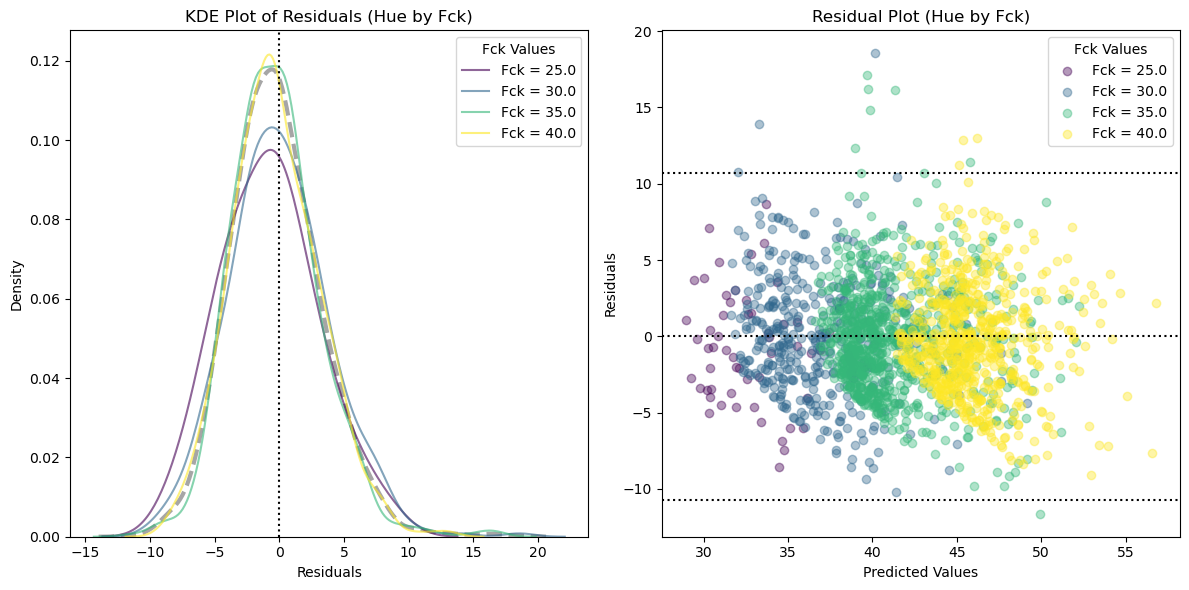

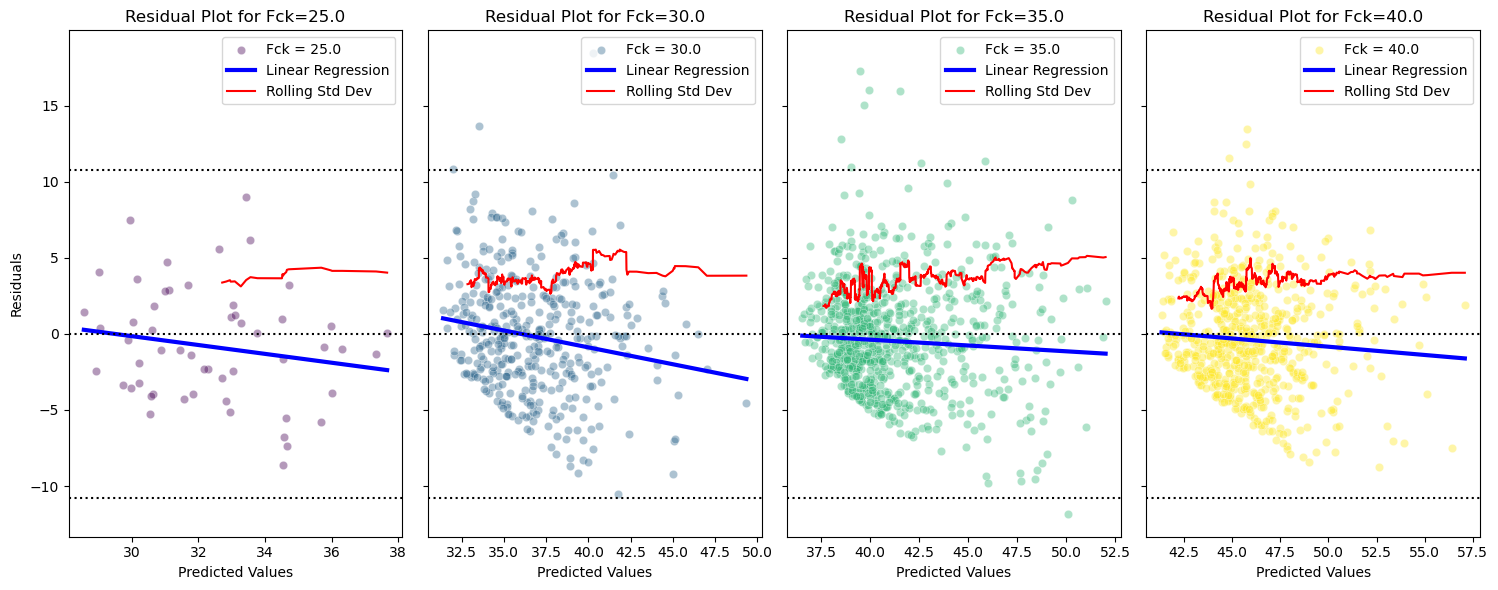

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CPIII	 "Treino": (630, 41)	 "Teste": (270, 41)


Fck: 30.0	 Treino: (218, 26)	 Validação: (93, 26)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(218, 15)","(93, 15)",3.978448,0.27924,4.630921,-0.055464,4.226686,0.084062




Fck: 35.0	 Treino: (112, 27)	 Validação: (48, 27)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(112, 15)","(48, 15)",1.734035,0.77801,3.251312,0.147387,3.041241,0.343393




Fck: 40.0	 Treino: (232, 28)	 Validação: (100, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(232, 15)","(100, 15)",2.259539,0.623934,3.383581,0.142904,3.556571,0.25593




Fck: 45.0	 Treino: (68, 27)	 Validação: (29, 27)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(68, 15)","(29, 15)",2.499768,0.309685,3.428131,-0.313215,3.127344,-0.166974




Ciment: CPIII	 Treino: (630, 40)	 Validação: (630,)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,3.857472,3.236727,3.872026,22.968749,16.282014,24.264174,0.400036,0.581601,0.375555,"(630, 15)","(270, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,2.446858,0.486918,3.190272,0.101444,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.425047,0.838818,3.138087,0.221004,"(943, 15)","(404, 15)"
2,CP II_35.0,Random Forest Regressor,1.871015,0.726429,2.787428,0.326844,"(1927, 15)","(827, 15)"
3,CP II_40.0,Random Forest Regressor,1.595567,0.782565,2.790762,0.260295,"(1526, 15)","(654, 15)"
4,CP II_all,Random Forest Regressor,1.105442,0.941183,2.889030,0.569567,"(4521, 15)","(1939, 15)"
5,CPIII_30.0,Random Forest Regressor,3.978448,0.279240,4.226686,0.084062,"(218, 15)","(93, 15)"
6,CPIII_35.0,Random Forest Regressor,1.734035,0.778010,3.041241,0.343393,"(112, 15)","(48, 15)"
7,CPIII_40.0,Random Forest Regressor,2.259539,0.623934,3.556571,0.255930,"(232, 15)","(100, 15)"
8,CPIII_45.0,Random Forest Regressor,2.499768,0.309685,3.127344,-0.166974,"(68, 15)","(29, 15)"
9,CPIII_all,Random Forest Regressor,3.236727,0.581601,3.857472,0.400036,"(630, 15)","(270, 15)"


Mean Squared Error (MSE): 20.923586983245837
Mean Absolute Error (MAE): 3.677119918284329
R-squared (R2): 0.45345780385793466


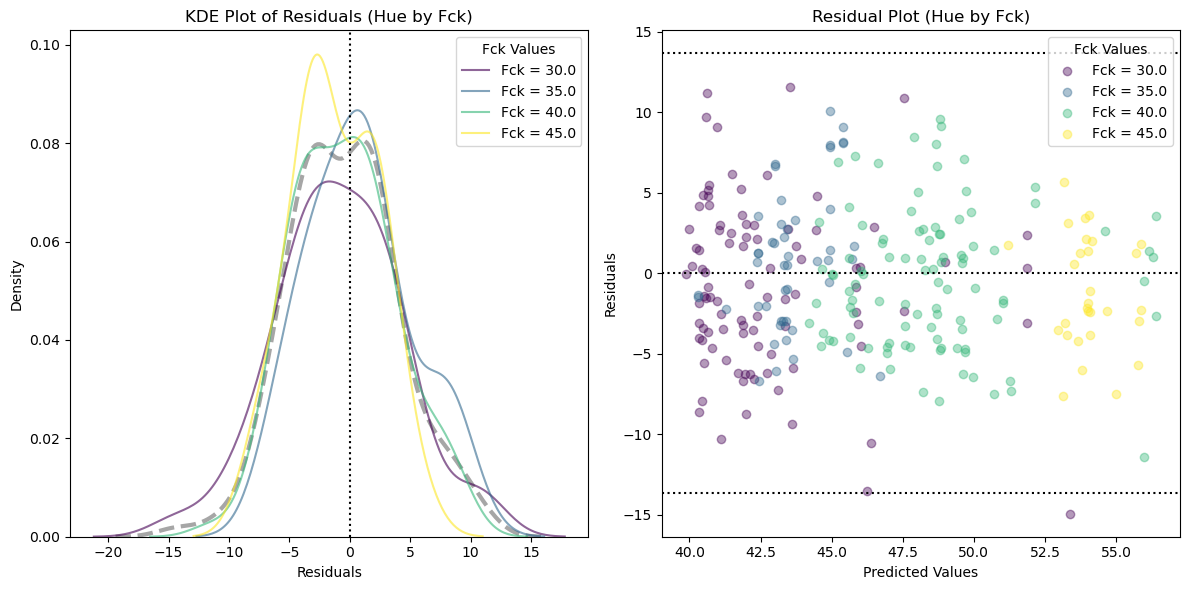

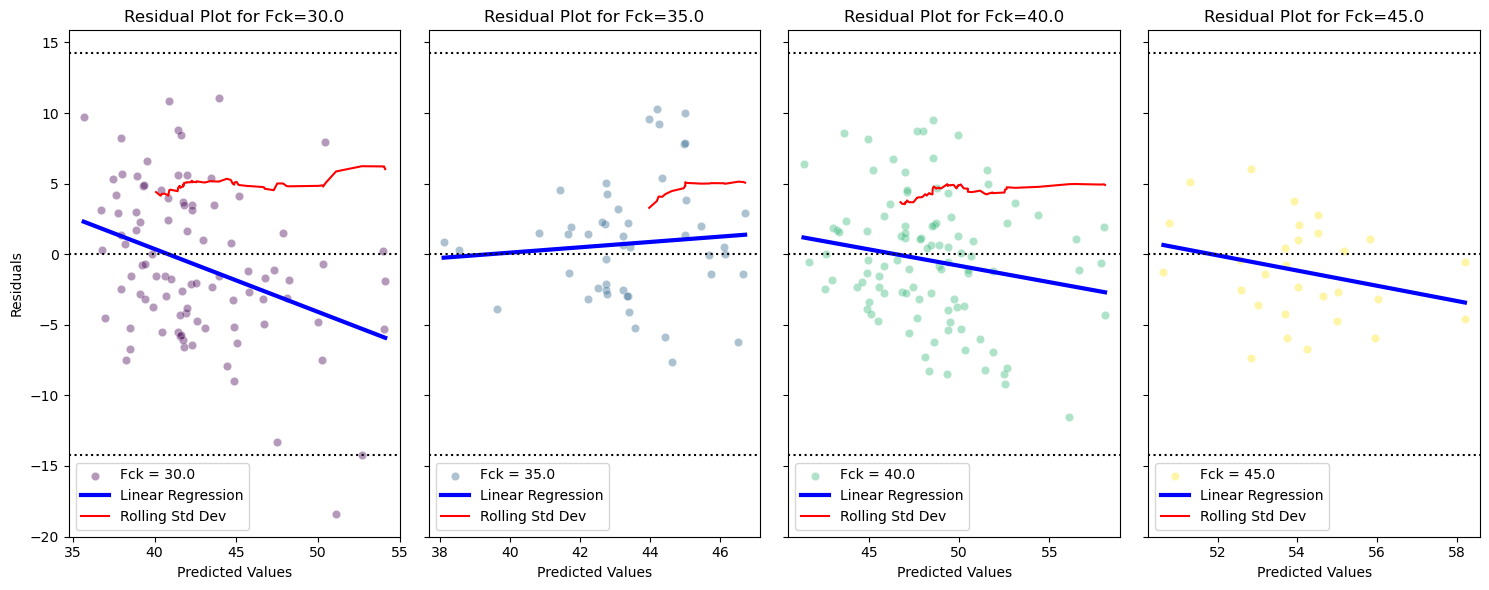

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CP IV	 "Treino": (755, 41)	 "Teste": (323, 41)


Fck: 25.0	 Treino: (23, 34)	 Validação: (10, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(23, 15)","(10, 15)",0.958966,0.836325,2.650553,-1.055323,3.974403,-0.392224




Fck: 30.0	 Treino: (164, 34)	 Validação: (70, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(164, 15)","(70, 15)",1.967121,0.521368,2.728494,0.135099,2.711699,0.166473




Fck: 35.0	 Treino: (224, 35)	 Validação: (96, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(224, 15)","(96, 15)",1.837815,0.463846,2.47545,0.043043,2.883104,-0.15144




Fck: 40.0	 Treino: (344, 35)	 Validação: (147, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(344, 15)","(147, 15)",0.874327,0.879643,2.288097,0.165251,2.163676,0.083044




Ciment: CP IV	 Treino: (755, 40)	 Validação: (755,)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,2.632402,1.423497,2.631778,12.875085,3.322263,11.268966,0.510345,0.875123,0.572038,"(755, 15)","(323, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,2.446858,0.486918,3.190272,0.101444,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.425047,0.838818,3.138087,0.221004,"(943, 15)","(404, 15)"
2,CP II_35.0,Random Forest Regressor,1.871015,0.726429,2.787428,0.326844,"(1927, 15)","(827, 15)"
3,CP II_40.0,Random Forest Regressor,1.595567,0.782565,2.790762,0.260295,"(1526, 15)","(654, 15)"
4,CP II_all,Random Forest Regressor,1.105442,0.941183,2.889030,0.569567,"(4521, 15)","(1939, 15)"
5,CPIII_30.0,Random Forest Regressor,3.978448,0.279240,4.226686,0.084062,"(218, 15)","(93, 15)"
6,CPIII_35.0,Random Forest Regressor,1.734035,0.778010,3.041241,0.343393,"(112, 15)","(48, 15)"
7,CPIII_40.0,Random Forest Regressor,2.259539,0.623934,3.556571,0.255930,"(232, 15)","(100, 15)"
8,CPIII_45.0,Random Forest Regressor,2.499768,0.309685,3.127344,-0.166974,"(68, 15)","(29, 15)"
9,CPIII_all,Random Forest Regressor,3.236727,0.581601,3.857472,0.400036,"(630, 15)","(270, 15)"


Mean Squared Error (MSE): 10.690062162430584
Mean Absolute Error (MAE): 2.4062912210086616
R-squared (R2): 0.5934437863926708


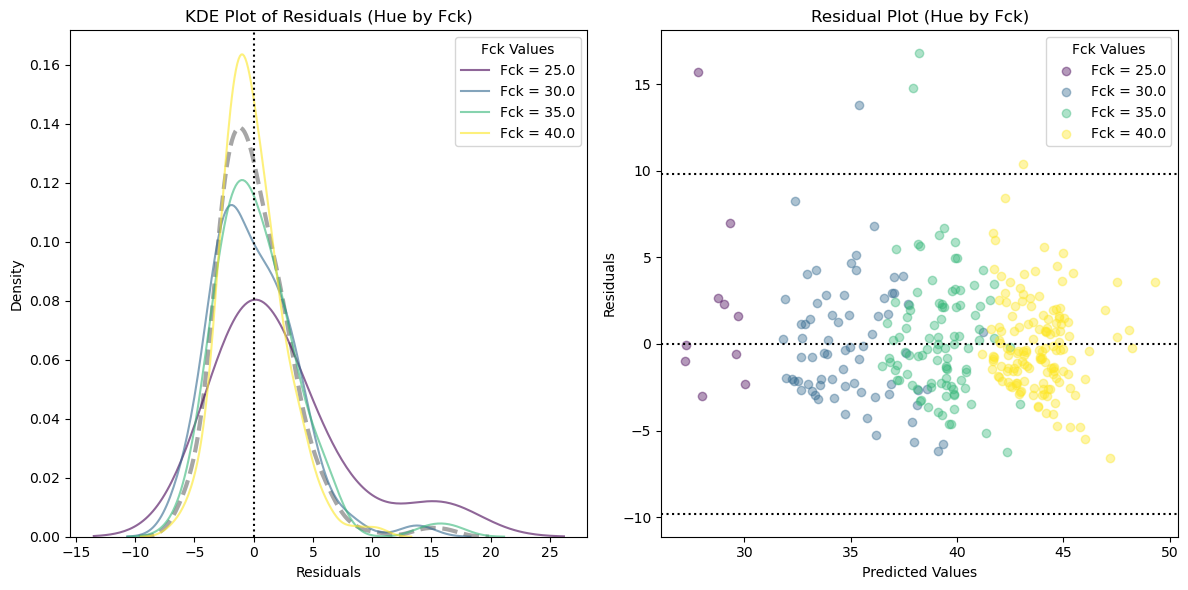

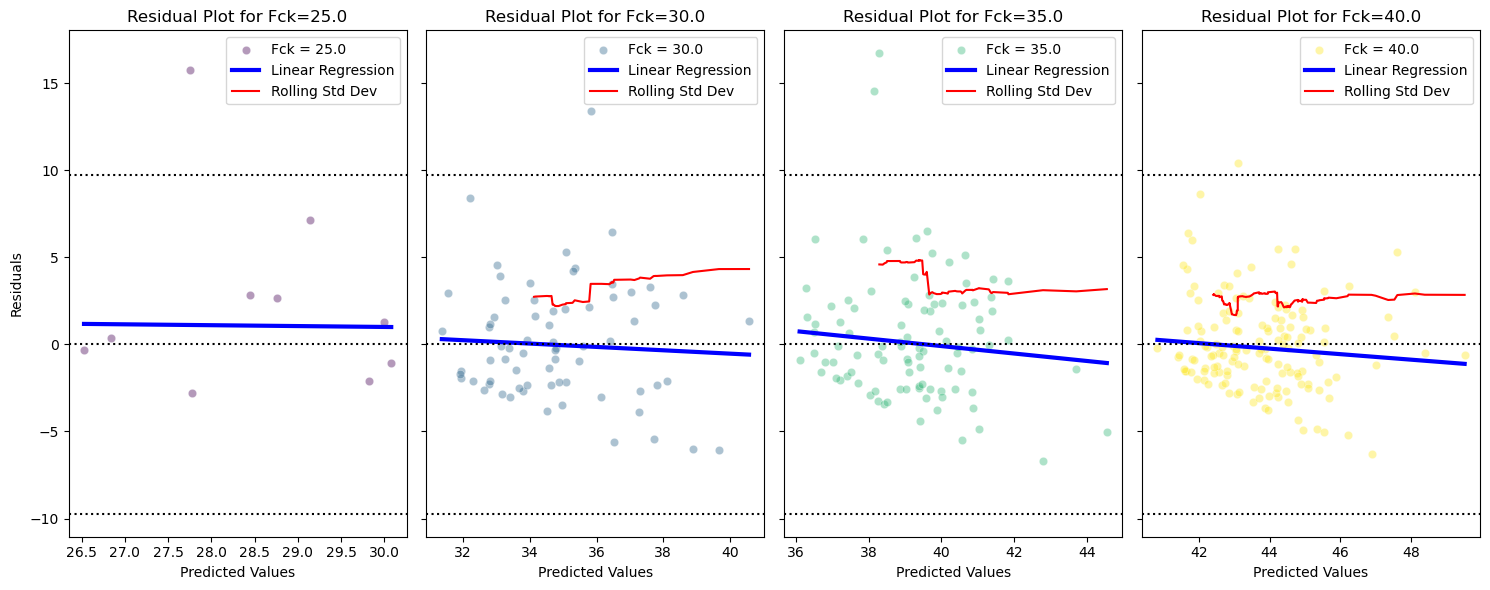

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CPV	 "Treino": (5273, 41)	 "Teste": (2260, 41)


Fck: 25.0	 Treino: (602, 28)	 Validação: (258, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(602, 15)","(258, 15)",2.742381,0.400698,3.164044,0.179799,2.81646,0.153552




Fck: 30.0	 Treino: (1353, 28)	 Validação: (581, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1353, 15)","(581, 15)",2.64362,0.518892,3.223997,0.290135,3.154545,0.327079




Fck: 35.0	 Treino: (2249, 29)	 Validação: (965, 29)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(2249, 15)","(965, 15)",2.504519,0.661534,3.160241,0.456852,3.003322,0.500932




Fck: 40.0	 Treino: (961, 29)	 Validação: (412, 29)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(961, 15)","(412, 15)",2.196508,0.640661,2.950881,0.340406,3.105835,0.303416




Fck: 45.0	 Treino: (102, 28)	 Validação: (44, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(102, 15)","(44, 15)",2.016919,0.526438,2.879708,-0.032809,2.442823,0.021928




Ciment: CPV	 Treino: (5273, 40)	 Validação: (5273,)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,3.015823,2.652706,3.144424,14.48288,11.397033,15.973921,0.650795,0.735995,0.630019,"(5273, 15)","(2260, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,2.446858,0.486918,3.190272,0.101444,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.425047,0.838818,3.138087,0.221004,"(943, 15)","(404, 15)"
2,CP II_35.0,Random Forest Regressor,1.871015,0.726429,2.787428,0.326844,"(1927, 15)","(827, 15)"
3,CP II_40.0,Random Forest Regressor,1.595567,0.782565,2.790762,0.260295,"(1526, 15)","(654, 15)"
4,CP II_all,Random Forest Regressor,1.105442,0.941183,2.889030,0.569567,"(4521, 15)","(1939, 15)"
5,CPIII_30.0,Random Forest Regressor,3.978448,0.279240,4.226686,0.084062,"(218, 15)","(93, 15)"
6,CPIII_35.0,Random Forest Regressor,1.734035,0.778010,3.041241,0.343393,"(112, 15)","(48, 15)"
7,CPIII_40.0,Random Forest Regressor,2.259539,0.623934,3.556571,0.255930,"(232, 15)","(100, 15)"
8,CPIII_45.0,Random Forest Regressor,2.499768,0.309685,3.127344,-0.166974,"(68, 15)","(29, 15)"
9,CPIII_all,Random Forest Regressor,3.236727,0.581601,3.857472,0.400036,"(630, 15)","(270, 15)"


Mean Squared Error (MSE): 13.838527126785218
Mean Absolute Error (MAE): 2.965930963426154
R-squared (R2): 0.6663310196323814


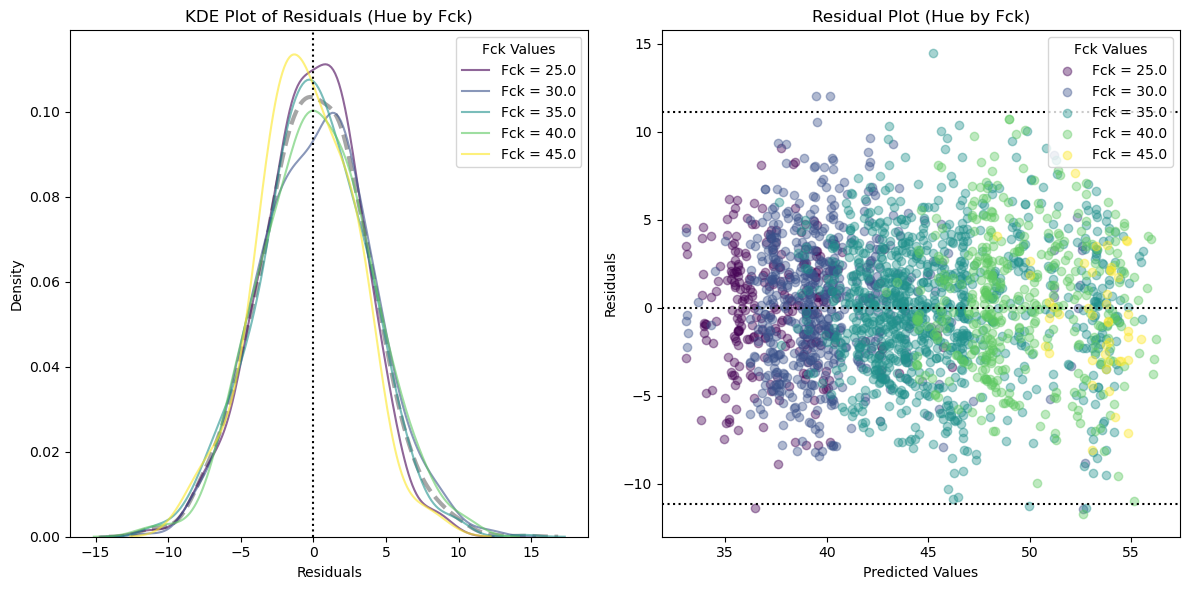

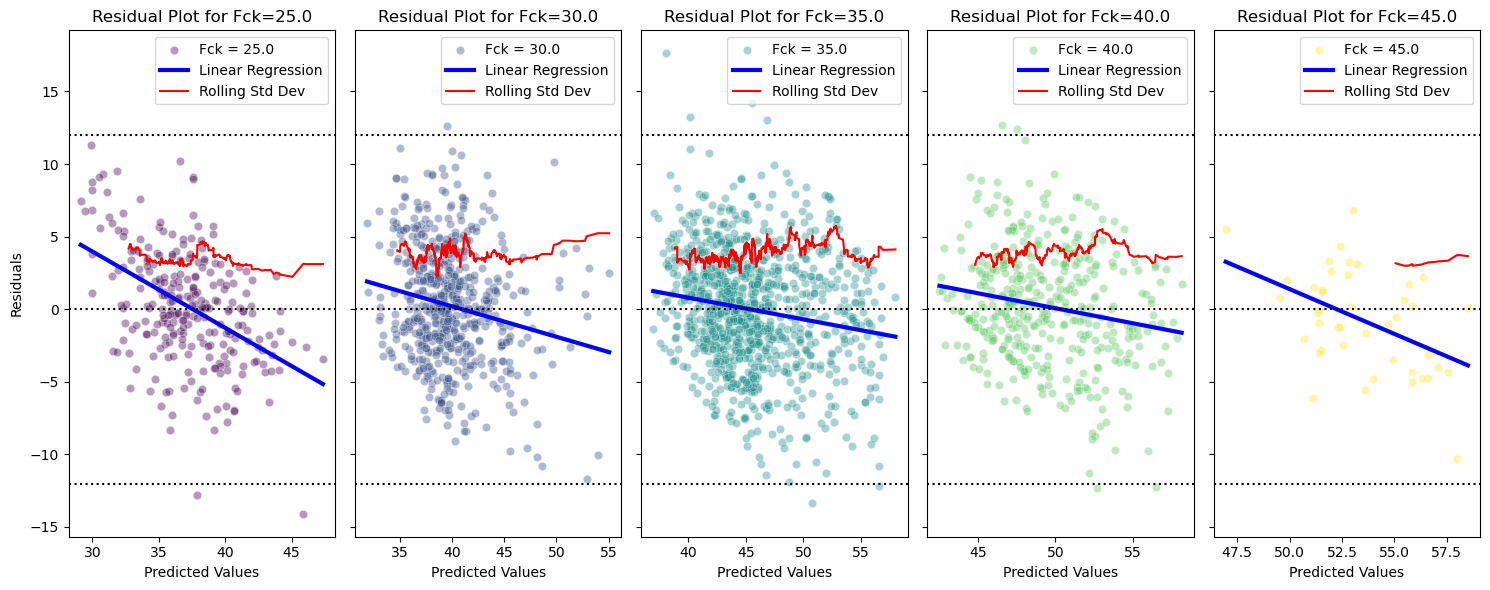

In [22]:
run_experiment_ciment_fck(X_tr = X_tr,
                          X_ts = X_ts,
                          y_tr = y_tr,
                          y_ts = y_ts,
                          param_grid_feat_selection = param_grid_feat_selection,
                          param_grid_regressor = param_grid_regressor,
                          group_columns = group_columns,
                          n_splits = 3)

# Classificador

In [23]:
def apply_standardization_filter(data, remove_params, verbose = True, regression = True):
    # TODO: implement filter to verify class/fck_min
    # concrete_class = 'CP V'
    # age = '7_days'

    data_processed = data.copy()  # Caso precise incluir features

    # Feature analysed: 'Fck'
    for feat, lim in remove_params.items():
        if verbose: print(f'{"Instâncias eliminadas devido a falta de representatividade (Fck = " + feat + " MPA):" :<90}',
              len(data_processed[data_processed['Fck'] == lim]))
        data_processed = data_processed[data_processed['Fck'] != lim]

    # Feature analysed: 'AC'
    if verbose: print(f'{"Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):" :<90}',
          len(data_processed[data_processed['AC'] > 0.65]))
    data_processed = data_processed[data_processed['AC'] <= 0.65]
    
    if regression:
        # Feature analysed: 'Fc 28d'
        ## Precisa de análise mais detalhada!!!
        data_processed['Status'] = np.where(data_processed['Fc 28d'] >= data_processed['Fck'], 1, 0)
        if verbose: print(f'{"Instâncias eliminadas devido não conformidade resistência especificada:" : <90}',
              len(data_processed[data_processed['Status'] == 0]))
        data_processed = data_processed[data_processed['Status'] == 1]

        data_processed.drop(columns = ['Status'], inplace = True)

    return data_processed

In [24]:
df_traco_processed_NBR

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
0,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
1,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1179.0,770.0,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685
2,303.0,AA,59842.0,16/03/2023,08:24:51,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.809998,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
3,303.0,AA,59849.0,16/03/2023,11:14:41,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.625000,2.797501,...,1163.0,768.0,1931.0,1.191781,2.791096,2.630137,0.000000,3.982877,2.630137,6.613014
4,303.0,AA,59841.0,16/03/2023,08:12:38,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.812500,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22811,303.0,N,71662.0,01/11/2022,13:43:40,FLORIANÓPOLIS,CP IV,32,363.250000,2.503750,...,956.0,795.0,1751.0,2.853731,0.000000,1.182090,1.191045,2.853731,2.373134,5.226866
22812,303.0,N,67943.0,11/04/2022,13:39:29,FLORIANÓPOLIS,CP IV,32,0.000000,0.000000,...,985.0,809.0,1794.0,2.914201,0.000000,1.165680,1.227811,2.914201,2.393491,5.307692
22813,303.0,N,68493.0,13/05/2022,13:47:33,FLORIANÓPOLIS,CP IV,32,366.000000,2.401249,...,1049.0,812.0,1861.0,0.677419,2.706452,1.277419,1.341935,3.383871,2.619355,6.003226
22814,303.0,N,68383.0,06/05/2022,10:51:32,FLORIANÓPOLIS,CP IV,32,384.166667,2.703334,...,1049.0,815.0,1864.0,0.677419,2.706452,1.280645,1.348387,3.383871,2.629032,6.012903


In [25]:
# Remove de acordo com parâmetros, aPlica filtros da norma (fator a/c, resistencia esperada,etc)
df_traco_processed_NBR_class = apply_standardization_filter(data = df_traco_processed,
                                                            remove_params = {'15': 15,
                                                                             '50': 50},
                                                            regression = False)

df_traco_processed_NBR_class

Instâncias eliminadas devido a falta de representatividade (Fck = 15 MPA):                 5
Instâncias eliminadas devido a falta de representatividade (Fck = 50 MPA):                 42
Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):         15836


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
12553,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
12806,303.0,AA,50335.0,17/11/2021,06:52:20,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.333333,2.808334,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
12842,303.0,AA,57427.0,30/09/2022,15:14:54,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.714286,2.509997,...,1160.0,750.0,1910.0,1.188356,2.784247,2.568493,0.000000,3.972603,2.568493,6.541096
12919,303.0,AA,49430.0,28/09/2021,12:59:05,SÃO JOSÉ DO RIO PRETO,CP II-F,40,320.375000,3.102497,...,1133.0,789.0,1922.0,1.153061,2.700680,2.683673,0.000000,3.853741,2.683673,6.537415
12976,303.0,AA,57608.0,13/10/2022,10:41:31,SÃO JOSÉ DO RIO PRETO,CP II-F,40,296.875000,2.511250,...,1146.0,748.0,1894.0,1.151007,2.694631,2.510067,0.000000,3.845638,2.510067,6.355705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236401,303.0,Z,74976.0,26/10/2021,13:47:38,BRASÍLIA,CP II-F,40,332.750000,3.693748,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236402,303.0,Z,74824.0,19/10/2021,15:59:24,BRASÍLIA,CP II-F,40,332.875000,3.714996,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236403,303.0,Z,82901.0,20/02/2023,08:07:39,BRASÍLIA,CP II-F,40,397.250000,4.003750,...,1017.0,722.0,1739.0,0.575071,2.305949,0.898017,1.147309,2.881020,2.045326,4.926346
236404,303.0,Z,76483.0,13/01/2022,07:37:00,BRASÍLIA,CP II-F,40,348.250000,3.303745,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931


In [26]:
X = df_traco_processed_NBR_class.drop(drop_columns, axis=1)
y = df_traco_processed_NBR_class[target]

# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = stratify_col,
                                                    random_state=42)


# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X_train[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train,
                                        test_size=0.3,
                                        stratify = stratify_col,
                                        random_state=42)

X_tr_clean = X_tr.drop(columns = group_columns)
X_ts_clean = X_ts.drop(columns = group_columns)

print('Training-Test set:')
for v in [y_train, y_test]:
    print(v.shape)

print('\nTraining-Validation set:')
for v in [y_tr, y_ts]:
    print(v.shape)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# Define the resampling methods
oversample = SMOTE(random_state = 42)
undersample = RandomUnderSampler(random_state = 42)

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

# Apply undersampling to the oversampled training data
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_oversampled, y_train_oversampled)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the balanced training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
    }

# Initialize a dictionary to store results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train_balanced)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

# Print the report
print("Classification Algorithms Performance Report:")
print(results_df)
np.unique(y_train_balanced, return_counts = True)
df_CPV.columns
qwe = df_concreto_traco[df_concreto_traco['cimento Tipo'] == 'CPV ARI RS'].copy()
for c in qwe.iloc[:, 5:]:
    qwe[c] = qwe[c].astype(float)
qwe.describe()